# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client"s request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [40]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [41]:
df = pd.read_csv("filtered_aircraft_data.csv", low_memory=False)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [42]:
# Calculate serious injury
#df["Fatal/Serious Fraction"] = (df["Bad.Injuries"]) / df["Total.Passengers"]
injury_calc_df = df.copy()
injury_calc_df["Fatal/Serious Fraction"] = injury_calc_df.apply(
    lambda row: min(1, (row["Total.Fatal.Injuries"] + row["Total.Serious.Injuries"]) / row["Total.Passengers"])
    if row["Total.Passengers"] > 0
    else 0,
    axis=1,
)

# Noting that this relies on correct information in the Total columns
# Also note that many accidents are occuring on the ground, which could be in big but empty planes
small_craft = injury_calc_df[df["Total.Passengers"] <= 20].copy()
large_craft = injury_calc_df[df["Total.Passengers"] > 20].copy()


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

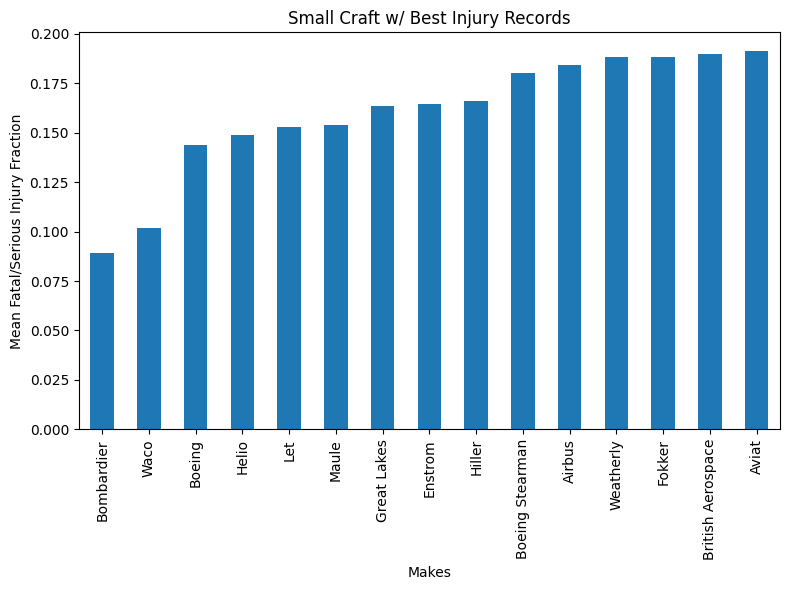

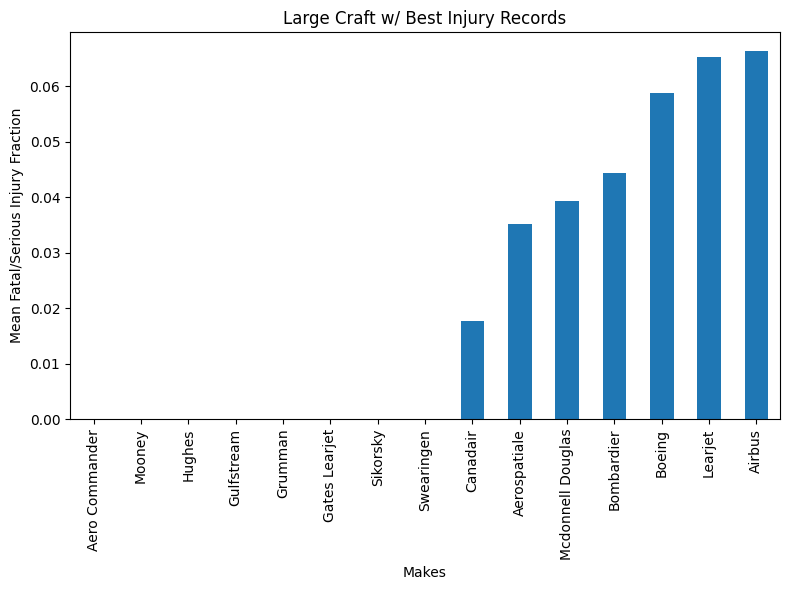

In [43]:
def plot_top15_makes(records, title):
    """Plots the top 15 makes with the lowest mean fatal/serious fraction."""
    # Filter for total passengers > 0 before grouping
    records = records[records["Total.Passengers"] > 0]
    grouped = records.groupby("Make")["Fatal/Serious Fraction"].mean().sort_values().head(15)
    grouped.plot(kind="bar", figsize=(8, 6), title=title)
    plt.ylabel("Mean Fatal/Serious Injury Fraction")
    plt.xlabel("Makes")
    plt.tight_layout()
    plt.show()

plot_top15_makes(small_craft, "Small Craft w/ Best Injury Records")
plot_top15_makes(large_craft, "Large Craft w/ Best Injury Records")

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

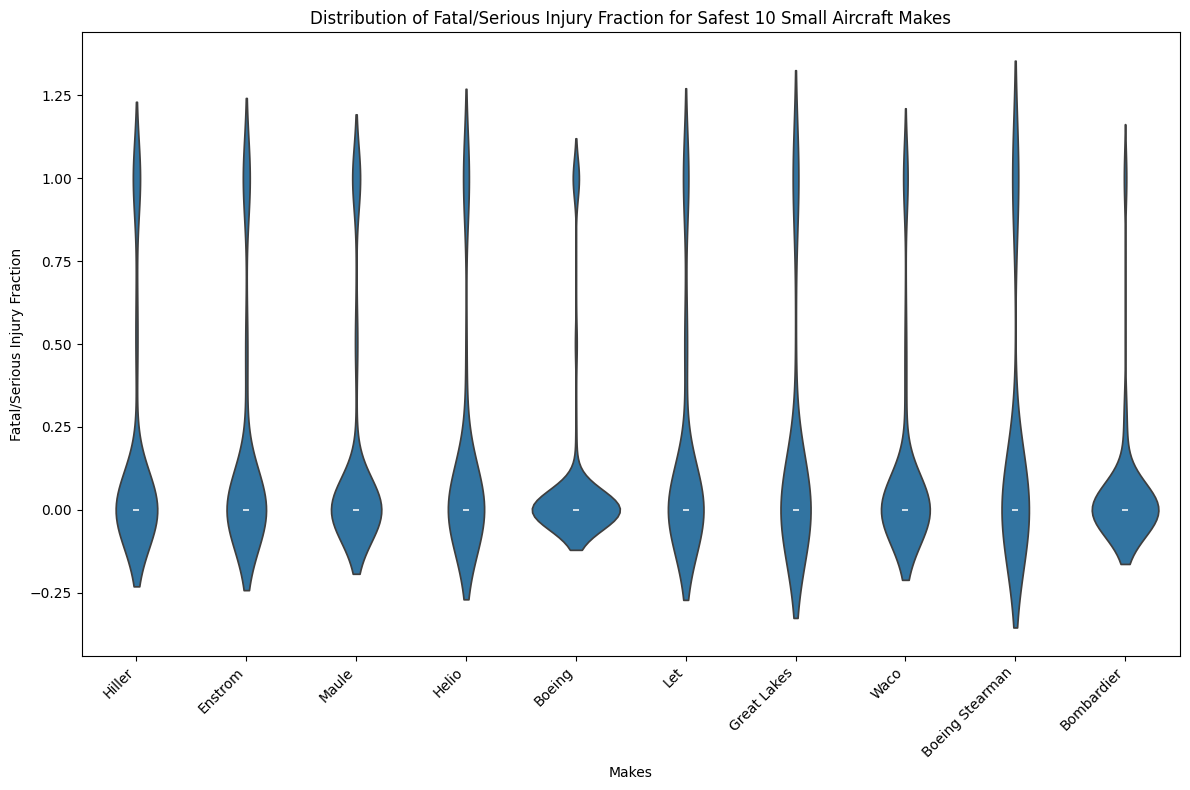

In [44]:
# Calculate the mean fraction for each make and select the top 10
top_10_makes = (
    small_craft[small_craft["Total.Passengers"] > 0]
    .groupby("Make")["Fatal/Serious Fraction"]
    .mean()
    .sort_values()
    .head(10)
    .index
)

# Filter the small aircraft DataFrame to include only the top 10 makes
filtered_small_aircraft = small_craft[small_craft["Make"].isin(top_10_makes)]

# Create the violin plot with seaborn
plt.figure(figsize=(12, 8))
sns.violinplot(x="Make", y="Fatal/Serious Fraction", data=filtered_small_aircraft)
plt.title("Distribution of Fatal/Serious Injury Fraction for Safest 10 Small Aircraft Makes")
plt.xticks(rotation=45, ha="right") # Horizontal alignment
plt.ylabel("Fatal/Serious Injury Fraction")
plt.xlabel("Makes") 
plt.tight_layout()
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

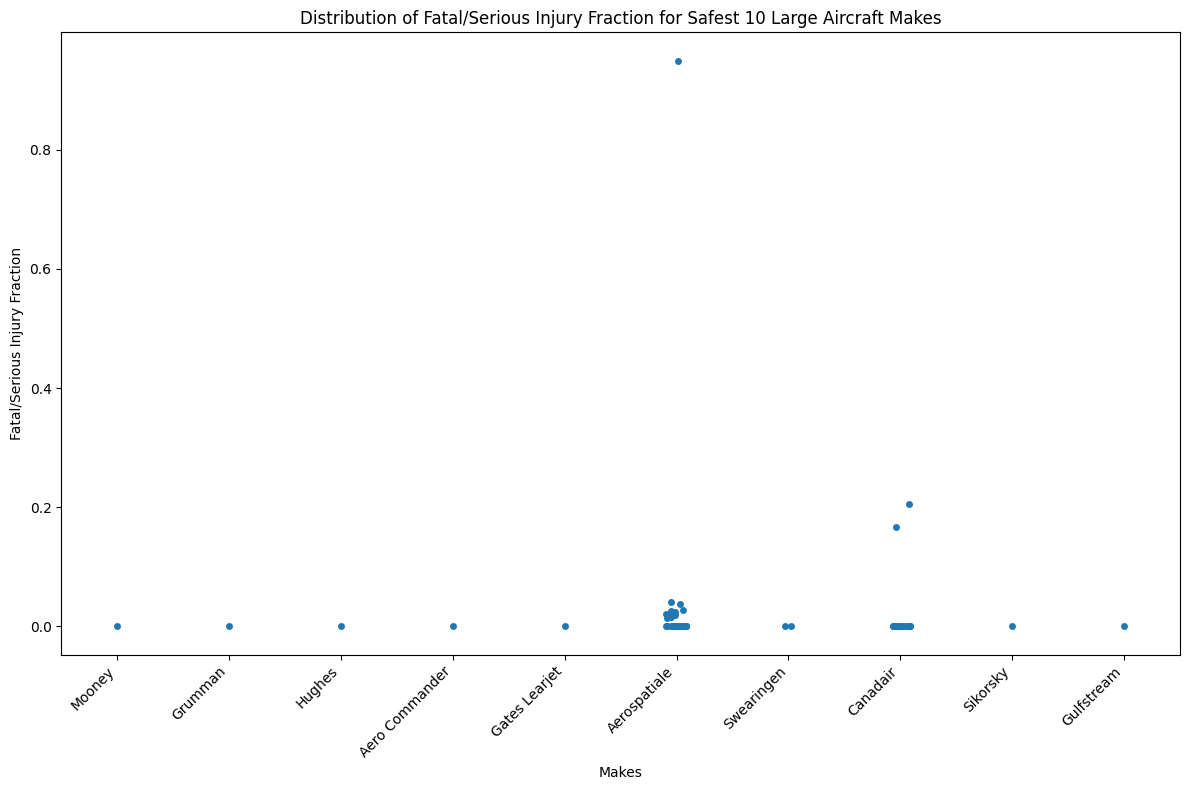

In [45]:
# Calculate the mean fraction for each make and select the top 10
top_10_makes = large_craft.groupby("Make")["Fatal/Serious Fraction"].mean().sort_values().head(10).index

# Filter the large aircraft DataFrame to include only the top 10 makes
filtered_large_aircraft = large_craft[large_craft["Make"].isin(top_10_makes)]

# Create the stripplot with seaborn
plt.figure(figsize=(12, 8))
sns.stripplot(x="Make", y="Fatal/Serious Fraction", data=filtered_large_aircraft, jitter=True)
plt.title("Distribution of Fatal/Serious Injury Fraction for Safest 10 Large Aircraft Makes")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Fatal/Serious Injury Fraction")
plt.xlabel("Makes")
plt.tight_layout()
plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

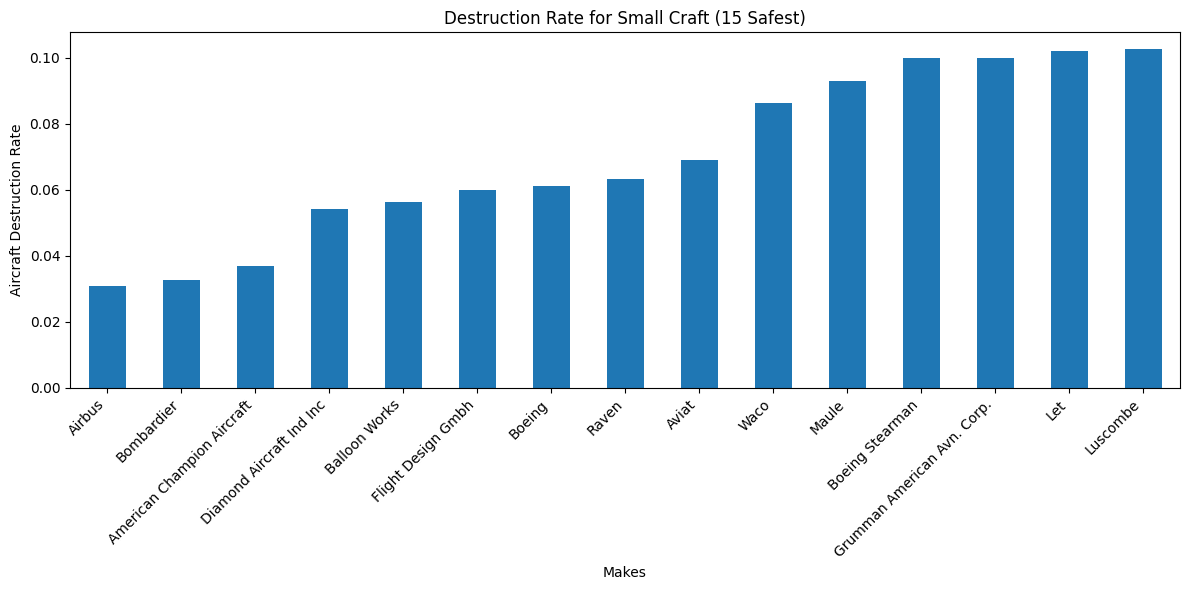

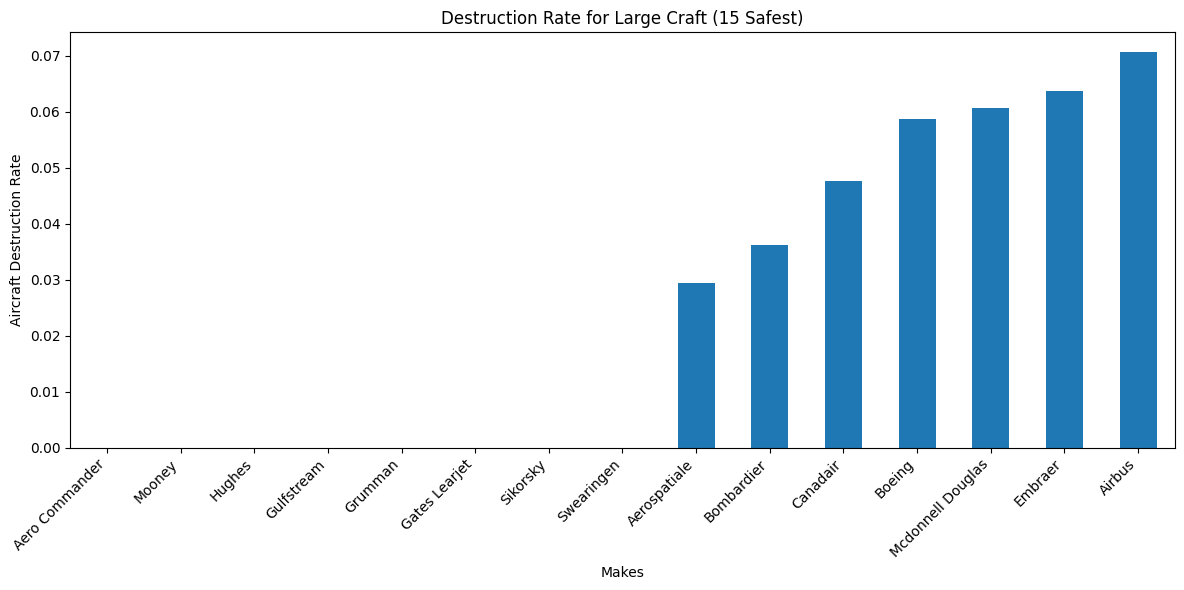

In [46]:
def plot_destruction_rate(records, title):
    """Plots the aircraft destruction rate by Make."""

    # Calculate the destruction rate (fraction of accidents with "Destroyed" damage)
    destruction_rates = records.groupby("Make")["Aircraft.damage"].apply(lambda x: (x == "Destroyed").mean()).sort_values().head(15)

    # Create the bar plot
    plt.figure(figsize=(12, 6))
    destruction_rates.plot(kind="bar")
    plt.title(title)
    plt.ylabel("Aircraft Destruction Rate")
    plt.xlabel("Makes")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

plot_destruction_rate(small_craft, "Destruction Rate for Small Craft (15 Safest)")
plot_destruction_rate(large_craft, "Destruction Rate for Large Craft (15 Safest)")

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

## Requested Analysis

#### Notes
Violin plot - we're seeing some issues with how the data is passed into Seaborn/matplotlib which seems to skew the Y-axis, pushing parts of the violins below 0.

Destruction rate - Even though we have a minimum sample size of 50 for each make, we're seeing 8 makes with a 0 desctruction rate. More analysis would be required to track this down and confirm the validity before we could draw any real conclusions.

#### Recommendations
Based on destruction and injury rate, Grumman, Sikorsky, Swearingen, Gates Learjet, Hughes, and Mooney all have excellent track records for large craft. 

For small craft, Bombardier and Boeing are the best options, as they are in the top 10 for both metrics.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

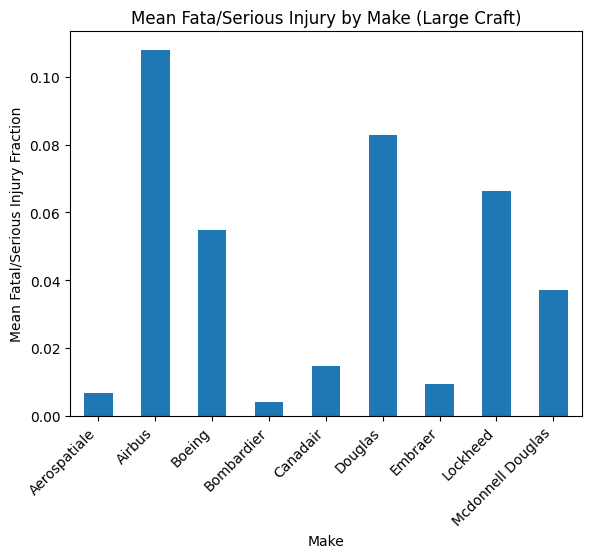

ValueError: Could not interpret value `Fatal/Serious Fraction` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [51]:
large_counts = large_craft["MakeModel"].value_counts()
valid_large_ind = large_counts[large_counts >= 10].index
valid_large = large_craft[large_craft["MakeModel"].isin(valid_large_ind)]

mean_fractions = valid_large.groupby("Make")["Fatal/Serious Fraction"].mean()
mean_fractions.plot(kind="bar", title="Mean Fata/Serious Injury by Make (Large Craft)")
plt.ylabel("Mean Fatal/Serious Injury Fraction")
plt.xticks(rotation=0)
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="Make", y="Fatal/Serious Fraction", data=df)
plt.title("Distribution of Fatal/Serious Injury Fraction by Make")
plt.ylabel("Fatal/Serious Injury Fraction")
plt.tight_layout()
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.